Plot the time series, along with any logical or necessary differences to get a stationary dataset

Generate and interpret a PACF for the time series (and/or its differences)

Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

Finally choose one specification and make the case for that as a logical model for your dataset.
This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

In [8]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Load and read the Sales csv file
df = pd.read_csv(r'/Users/alexanderheinz/Downloads/UNRATE.csv')

In [10]:
df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


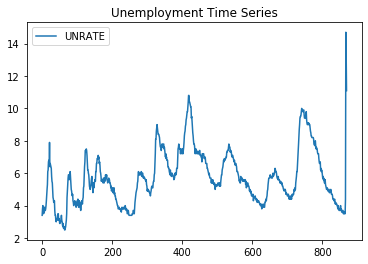

In [11]:
df.plot()
plt.title('Unemployment Time Series')
plt.show()

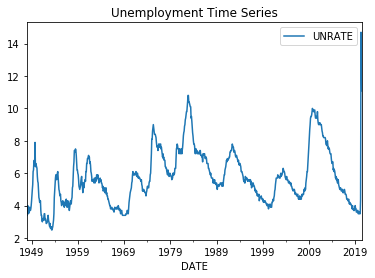

In [12]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Unemployment Time Series')
plt.show()

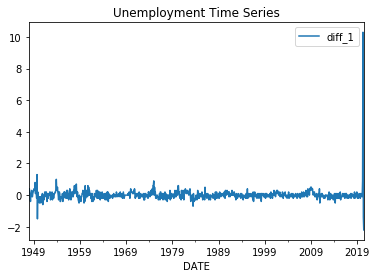

In [13]:
df['diff_1'] = df.UNRATE - df.UNRATE.shift()
df.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

Text(0.5, 1.0, 'Unemployment PACF')

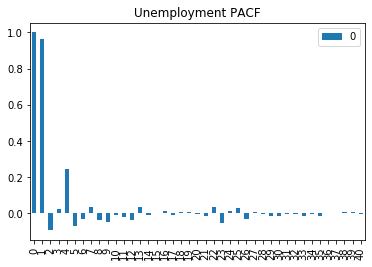

In [14]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.UNRATE))
x_acf.plot(kind='bar')
plt.title("Unemployment PACF")

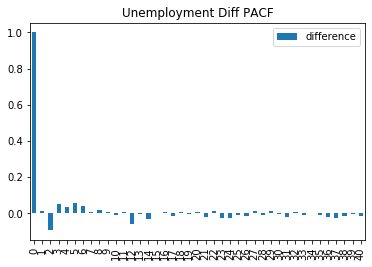

In [15]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment Diff PACF")
plt.legend(['difference'])

Our initial time series has 1, maybe 2, strong autocorrelation but the differences seem to show no real autocorrelation. Let's build some ARIMA models to experiment and see how we do!

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.UNRATE, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  869
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -472.488
Method:                           css   S.D. of innovations              0.417
Date:                Sun, 19 Jul 2020   AIC                            948.975
Time:                        14:25:15   BIC                            958.510
Sample:                    02-01-1948   HQIC                           952.623
                         - 06-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.014      0.627      0.531      -0.019       0.037
Residuals Description
count    8.690000e+02
mean     2.877224e-09
std      4.170085e-01
min     -2.208861e+00
25%     -1.088608e-01

/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.UNRATE, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  870
Model:                     ARMA(1, 0)   Log Likelihood                -470.236
Method:                       css-mle   S.D. of innovations              0.415
Date:                Sun, 19 Jul 2020   AIC                            946.471
Time:                        14:25:15   BIC                            960.777
Sample:                    01-01-1948   HQIC                           951.945
                         - 06-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.8759      0.541     10.854      0.000       4.815       6.937
ar.L1.UNRATE     0.9751      0.008    120.337      0.000       0.959       0.991
                                    Roots   

/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [18]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.UNRATE, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  870
Model:                     ARMA(1, 1)   Log Likelihood                -469.724
Method:                       css-mle   S.D. of innovations              0.414
Date:                Sun, 19 Jul 2020   AIC                            947.448
Time:                        14:25:15   BIC                            966.522
Sample:                    01-01-1948   HQIC                           954.746
                         - 06-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.8616      0.513     11.428      0.000       4.856       6.867
ar.L1.UNRATE     0.9726      0.009    110.423      0.000       0.955       0.990
ma.L1.UNRATE     0.0395      0.039      1.01

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(df.UNRATE, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  869
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -469.424
Method:                       css-mle   S.D. of innovations              0.415
Date:                Sun, 19 Jul 2020   AIC                            946.848
Time:                        14:25:15   BIC                            965.917
Sample:                    02-01-1948   HQIC                           954.145
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0091      0.015      0.628      0.530      -0.019       0.038
ar.L1.D.UNRATE    -0.8362      0.117     -7.143      0.000      -1.066      -0.607
ma.L1.D.UNRATE     0.8913      0.105

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.UNRATE, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/alexanderheinz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  869
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -451.401
Method:                       css-mle   S.D. of innovations              0.406
Date:                Sun, 19 Jul 2020   AIC                            926.801
Time:                        14:25:18   BIC                            984.009
Sample:                    02-01-1948   HQIC                           948.692
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0143      0.020      0.731      0.465      -0.024       0.053
ar.L1.D.UNRATE    -0.1200      0.156     -0.770      0.441      -0.425       0.185
ar.L2.D.UNRATE     0.1239      0.107

Text(0.5, 1.0, 'Histogram of Residuals')

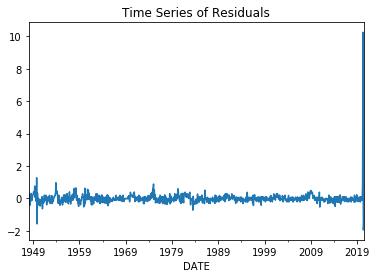

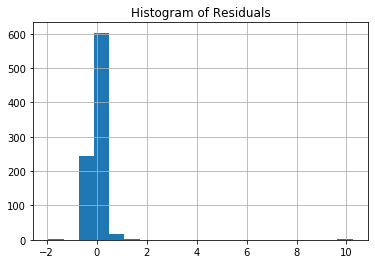

In [21]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

When we look at these residuals plots, we can make two reasonable assumptions. Firstly, there isn't a clear trend in the residuals. There are definitely places of higher volatility, and our model could be expanded to include not time series elements that could account for that variation (by that we mean typical regression coefficients as we did in the linear modeling sections before, though this would require a dataset that includes such features). However, there isn't a clear trend to the data indicating an obviously missed seasonality.

Secondly, our residuals seem approximately abnormal. There is a very long tail on the hgiher end, but that is a very small number of observations that are likely outliers or caused by some external influence.

1,0,0 Constant is 5.876. Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being 0.975. There is no moving average term

1,0,1 Constant is 5.860. Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being 0.973. The moving average term is approximately 0.0395, meaning that by incorporating the moving average term in the model, the error present in the model will be increased by about 4% per day. The moving average part indicates that the regression error is actually a linear combination of error terms whose values occurred both in the current time lag and at various times in the past.

1,1,1 Constant is 0.0091. Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being -0.836. The moving average term is approximately 0.890, meaning that by incorporating the moving average term in the model, the error present in the model will be increased by about 89% per day. The moving average part indicates that the regression error is actually a linear combination of error terms whose values occurred both in the current time lag and at various times in the past.

5,1,5 Constant is 0.0143. Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being -0.12. The moving average term is approximately 0.12, meaning that by incorporating the moving average term in the model, the error present in the model will be increased by about 12% per day. The moving average part indicates that the regression error is actually a linear combination of error terms whose values occurred both in the current time lag and at various times in the past.